# Principles of Data Science Assignment 1

## Stage 1

Overview

### 1. Start by importing useful Python libraries.

In [90]:
import pandas as pd
import xgboost as xgb
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

### 2. Import Data from CSV files

Load all files into dataframes.

| File Name | Size |
| ------ | ----------- |
| log_feature.csv  | (31170,2) |
| event_type.csv | (56671,3) |
| resource_type.csv   | (21076,2) |
| severity.csv  | (18552,2) |
| test.csv| (11171,2) |
| train.csv  | (7381,3) |

While loading, take opportunity to prepare the data for use in training the classifier:
1. Strip strings from categories 
2. Convert categorical variables into numeric (since XGBoost deals with numerics)
3. Retain csv column headings for use in the dataframe

In [22]:
convert = lambda x: int(x.split()[1])

log_feature_df = pd.read_csv('/Users/tijohnso/Kaggle_Telstra/Telstra_Original_Data/log_feature.csv', converters = {'log_feature': convert}, header=0)
event_type_df = pd.read_csv('/Users/tijohnso/Kaggle_Telstra/Telstra_Original_Data/event_type.csv', converters = {'event_type': convert}, header=0)
resource_type_df = pd.read_csv('/Users/tijohnso/Kaggle_Telstra/Telstra_Original_Data/resource_type.csv', converters = {'resource_type': convert}, header=0)
severity_type_df = pd.read_csv('/Users/tijohnso/Kaggle_Telstra/Telstra_Original_Data/severity_type.csv', converters = {'severity_type': convert}, header=0)
test_df = pd.read_csv('/Users/tijohnso/Kaggle_Telstra/Telstra_Original_Data/test.csv', converters = {'location': convert}, header=0)
train_df = pd.read_csv('/Users/tijohnso/Kaggle_Telstra/Telstra_Original_Data/train.csv', converters = {'location': convert}, header=0)

### 3. Assess data



#### 3-1. Display dataframe heads and tails

In [87]:
log_feature_df

,id,log_feature,volume
0,6597,68,6
1,8011,68,7
2,2597,68,1
3,5022,172,2
4,5022,56,1
5,5022,193,4
6,5022,71,3
7,6852,201,2
8,6852,56,1
9,6852,80,2


In [37]:
event_type_df

,id,event_type
0,6597,11
1,8011,15
2,2597,15
3,5022,15
4,5022,11
5,6852,11
6,6852,15
7,5611,15
8,14838,15
9,14838,11


In [32]:
resource_type_df

,id,resource_type
0,6597,8
1,8011,8
2,2597,8
3,5022,8
4,6852,8
5,5611,8
6,14838,8
7,2588,8
8,4848,8
9,6914,8


In [31]:
severity_type_df

,id,severity_type
0,6597,2
1,8011,2
2,2597,2
3,5022,1
4,6852,1
5,5611,2
6,14838,1
7,2588,1
8,4848,1
9,6914,1


In [30]:
test_df

,id,location
0,11066,481
1,18000,962
2,16964,491
3,4795,532
4,3392,600
5,3795,794
6,2881,375
7,1903,638
8,5245,690
9,6726,893


In [40]:
train_df

,id,location,fault_severity
0,14121,118,1
1,9320,91,0
2,14394,152,1
3,8218,931,1
4,14804,120,0
5,1080,664,0
6,9731,640,0
7,15505,122,0
8,3443,263,1
9,13300,613,1


#### 3-2. Assess Features

The following are the features inherent in the dataframes and type of feature:

| Feature Name | Feature Type | Table |
| ------ | ----------- | ------ |
| id  | Categorical | All |
| log_feature  | Categorical | log_feature_df |
| volume  | Numeric | log_feature_df |
| event_type | Categorical | event_type_df |
| resource_type   | Categorical | resource_type_df |
| severity  | Categorical | severity_type_df |
| location  | Categorical | train_df |

### 4. Visualise data

Join tables quickly just to enable visualisation of these features correlated against each other.

In [102]:
join_df=pd.merge(left=train_df,right=resource_type_df, how='left', left_index=True, right_index=True)
join_df=pd.merge(left=join_df,right=severity_type_df, how='left', left_index=True, right_index=True)
join_df=pd.merge(left=join_df,right=event_type_df, how='left', left_index=True, right_index=True)
join_df=pd.merge(left=join_df,right=log_feature_df, how='left', left_index=True, right_index=True)

In [103]:
join_df

,id_x,location,fault_severity,id_y,resource_type,id_x,severity_type,id_y,event_type,id,log_feature,volume
0,14121,118,1,6597,8,6597,2,6597,11,6597,68,6
1,9320,91,0,8011,8,8011,2,8011,15,8011,68,7
2,14394,152,1,2597,8,2597,2,2597,15,2597,68,1
3,8218,931,1,5022,8,5022,1,5022,15,5022,172,2
4,14804,120,0,6852,8,6852,1,5022,11,5022,56,1
5,1080,664,0,5611,8,5611,2,6852,11,5022,193,4
6,9731,640,0,14838,8,14838,1,6852,15,5022,71,3
7,15505,122,0,2588,8,2588,1,5611,15,6852,201,2
8,3443,263,1,4848,8,4848,1,14838,15,6852,56,1
9,13300,613,1,6914,8,6914,1,14838,11,6852,80,2


#### 4-1. Location versus Fault Severity

First check for a correlation between location and fault_severity. There appears to be a relationship between fault_severity and location. Most noticeably as indicated by a big gap in the top row of the 3d plot below, fault_severity 2 is particularly sensitive to location.

We also plot ID as a 3rd dimension (coming out of the page) and don't see much if any relationship. The ID dimension according to the Kaggle team is meant to be just a vehicle for joining tables.

<IPython.core.display.Javascript object>


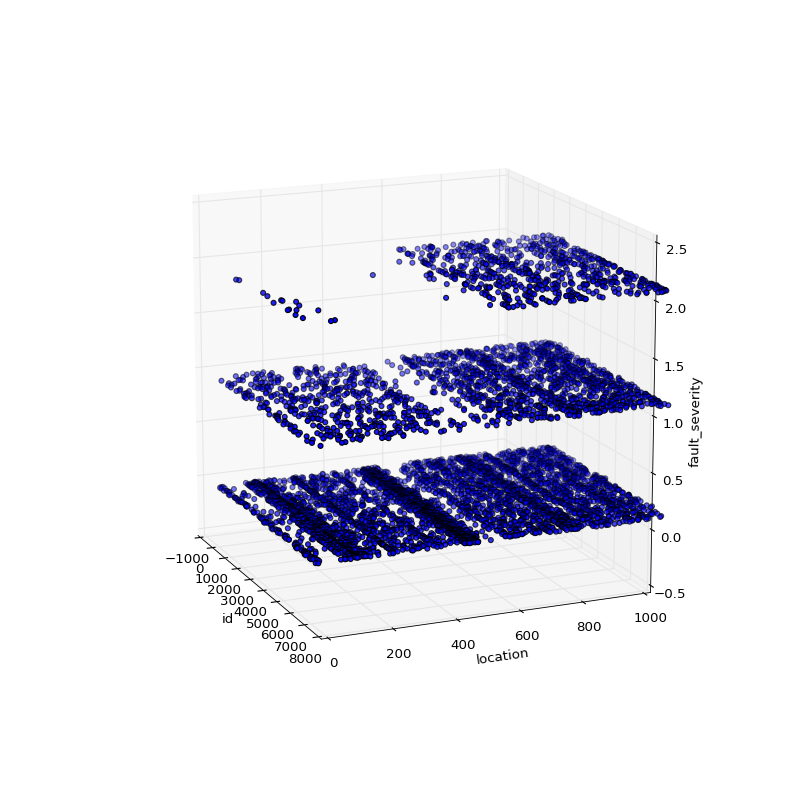

In [125]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['location'], join_df['fault_severity'])
fig3d.set_ylim3d(0,1000)
fig3d.set_xlabel('id')
fig3d.set_ylabel('location')
fig3d.set_zlabel('fault_severity')
plot.show()

#### 4-2. Severity_type versus Fault Severity

Check for a correlation between severity_type and fault_severity. If there is a relationship here, it is more difficult to identify than for location. There are only 2 or 3 dominant severity_types so the amount of data at each of these main data points may mask visibility of any correlations.

<IPython.core.display.Javascript object>


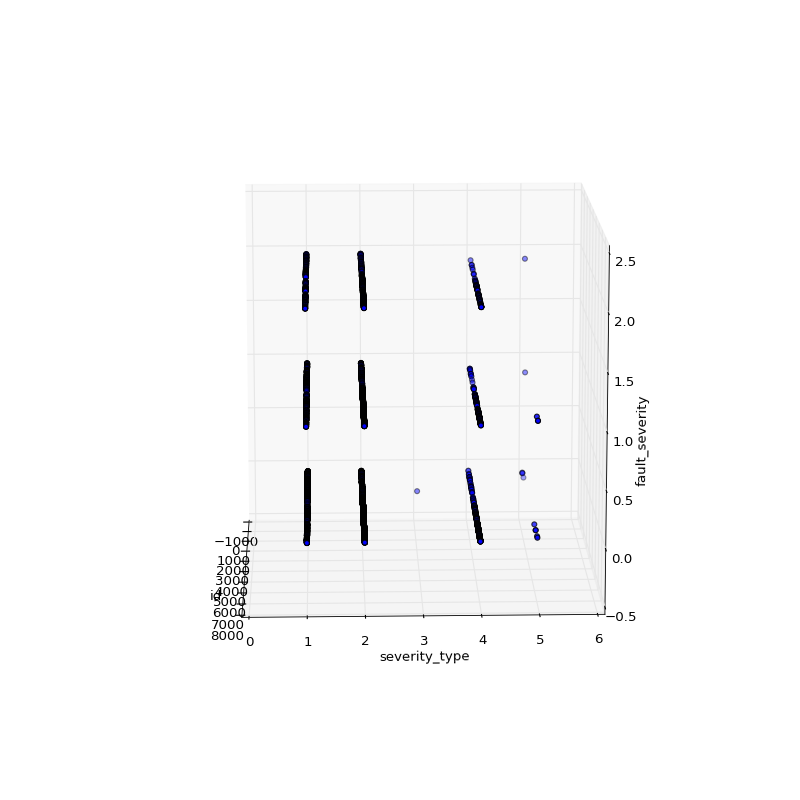

In [121]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['severity_type'], join_df['fault_severity'])
fig3d.set_xlabel('id')
fig3d.set_ylabel('severity_type')
fig3d.set_zlabel('fault_severity')
plot.show()

#### 4-3. Event_type versus Fault Severity

<IPython.core.display.Javascript object>


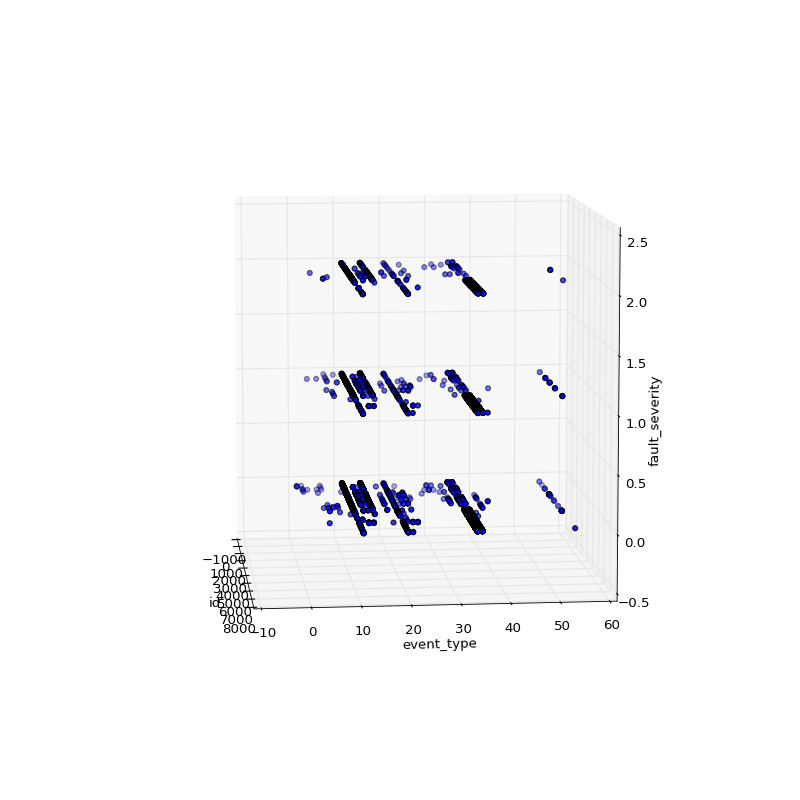

In [129]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['event_type'], join_df['fault_severity'])
fig3d.set_xlabel('id')
fig3d.set_ylabel('event_type')
fig3d.set_zlabel('fault_severity')
# Set viewpoint.
ax.azim = -60
ax.elev = 300
plot.show()

#### 4-4. Log_feature versus Fault Severity

<IPython.core.display.Javascript object>


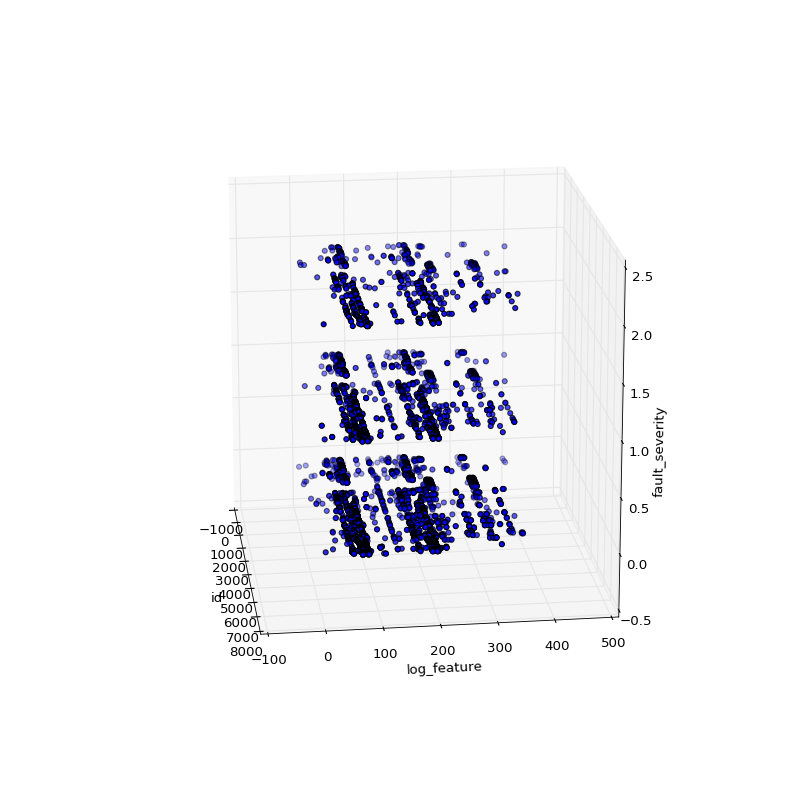

In [123]:

fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['log_feature'], join_df['fault_severity'])
fig3d.set_xlabel('id')
fig3d.set_ylabel('log_feature')
fig3d.set_zlabel('fault_severity')
plot.show()

#### 4-5. Resource_type versus Fault Severity 

<IPython.core.display.Javascript object>


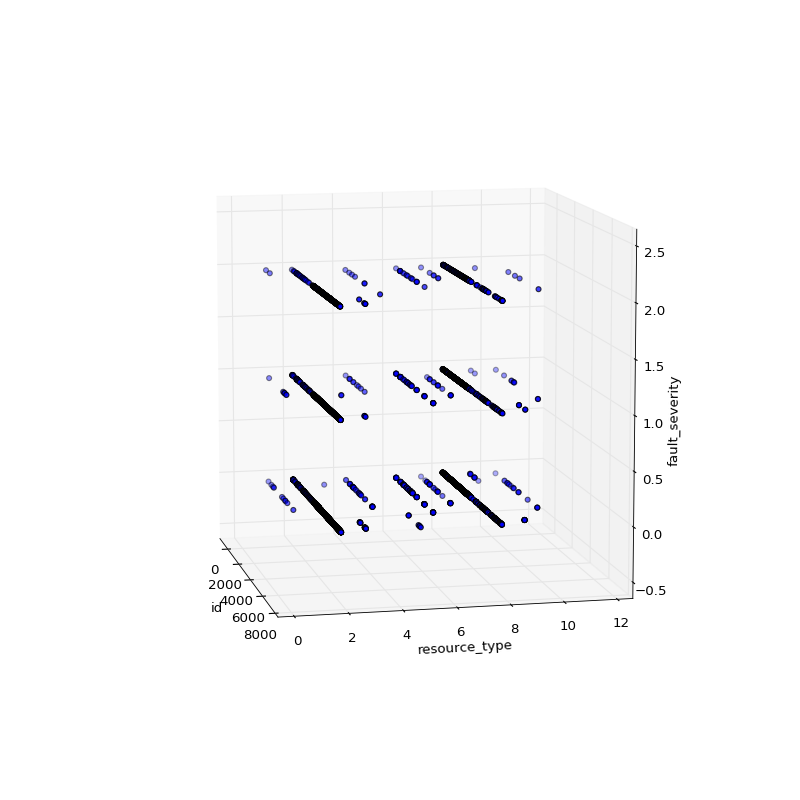

In [132]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['resource_type'], join_df['fault_severity'])
fig3d.set_xlabel('id')
fig3d.set_ylabel('resource_type')
fig3d.set_zlabel('fault_severity')
plot.show()

#### 4-5. Log_feature versus Volume versus Fault Severity 

Is it just my imagination or are there more fault_severity = 2 events when there is a lower volume of log events? Especially for the higher log_feature numbers.

<IPython.core.display.Javascript object>


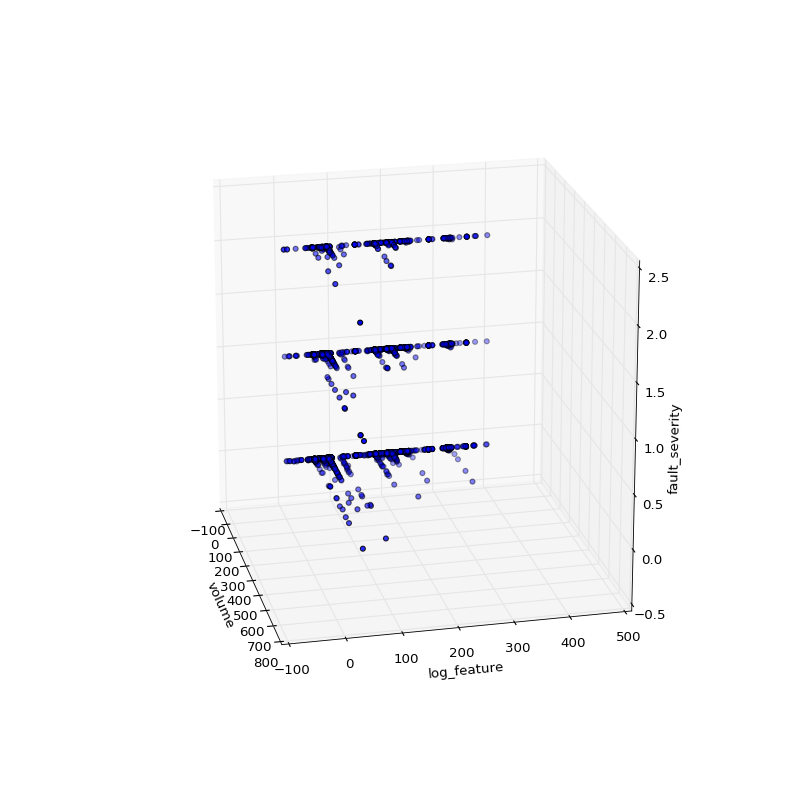

In [133]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df['volume'], join_df['log_feature'], join_df['fault_severity'])
fig3d.set_xlabel('volume')
fig3d.set_ylabel('log_feature')
fig3d.set_zlabel('fault_severity')
plot.show()

### 5. Prepare Data for classifier training

#### 5-1. Handle categorical features as necessary

For the following features:

| Feature Name | Feature Type | Table |
| ------ | ----------- | ------ |
| id  | Categorical | All |
| log_feature  | Categorical | log_feature_df |
| volume  | Numeric | log_feature_df |
| event_type | Categorical | event_type_df |
| resource_type   | Categorical | resource_type_df |
| severity  | Categorical | severity_type_df |
| location  | Categorical | train_df |

1. Convert "log_features", "event_type", "resource_type", "severity_type" to one-hot-encoded features. 
2. Retain "location" and ID as label-encoded categorical features. 
3. Retain volume as a numeric feature. 

Note: Since there are over 1000 locations, initial decision is not to one-hot-encode "location".

In [33]:
log_dummies=pd.get_dummies(log_feature_df['log_feature'],prefix='log').astype(np.int8)
ev_dummies=pd.get_dummies(event_type_df['event_type'],prefix='ev').astype(np.int8)
res_dummies=pd.get_dummies(resource_type_df['resource_type'],prefix='res').astype(np.int8)
sev_dummies=pd.get_dummies(severity_type_df['severity_type'],prefix='sev').astype(np.int8)


#### 5-2. Assemble tables

Concatenate applicable one-hot-encoded, label encoded and numeric columns into applicable dataframes.

In [149]:
log_cols=(log_feature_df['id'],log_feature_df['volume'],log_dummies)
log_df=pd.concat(log_cols,axis=1)

ev_cols=(event_type_df['id'],ev_dummies)
ev_df=pd.concat(ev_cols,axis=1)

res_cols=(resource_type_df['id'],res_dummies)
res_df=pd.concat(res_cols,axis=1)

sev_cols=(severity_type_df['id'],sev_dummies)
sev_df=pd.concat(sev_cols,axis=1)

#### 5-3. Group the data to eliminate duplicate IDs

Group by id for each dataset using the Pandas groupby() function and check number of groups

| Original Table | Size |Grouped Table | Size | Duplicate Rows |
| ------ | ----------- |------ | ----------- | -----------  |
| log_df  | (58671,3) |log_gp_sum  | (7381,2) | Yes |
| ev_df | (31170,2) |ev_gp_sum  | (18552,2) | Yes |
| res_df   | (21076,2) |res_gp_sum | (18552,2) | Yes |
| sev_df  | (18552,2) |sev_gp_sum | (18552,2) | No |
| test_df| (11171,2) |test_gp_sum | (11171,2) | No |
| train_df| (7381,2) |train_gp_sum | (7381,2) | No |

Note:
+ The number of rows for sev_df, test_df and train_df (containing severity_type, location features) is the same before and after grouping. Hence they contain no duplicate IDs.
+ The number of rows for log_df, ev_df, res_df (containing log_feature, event_type, resource_type) is less after grouping. Hence, these tables have duplicate ids.

#### 5-4. Sum the one-hot-encoded data to "squash together" into a single row per group 

For groups of onehotencoded columns, it is possible to accumulate all rows of each group into a single row. Use the Pandas groupby.sum() function to achieve this "squashing together" of groups.

#### 5-5. Sort the data to allow for joining

To ensure all tables that will be joined are sorted in the same way, use "Sort=True" by id column.

In [150]:
log_gp_sum=log_df.groupby('id',sort=True).sum()
ev_gp_sum=ev_df.groupby('id',sort=True).sum()
res_gp_sum=res_df.groupby('id',sort=True).sum()
sev_gp_sum=sev_df.groupby('id',sort=True).sum()
test_gp_sum=test_df.groupby('id',sort=True).sum()
train_gp_sum=train_df.groupby('id',sort=True).sum()

#### 5-6. Join training set tables together

In [151]:
train_X_df=pd.merge(left=train_gp_sum,right=res_gp_sum, how='left', left_index=True, right_index=True)
train_X_df=pd.merge(left=train_X_df,right=sev_gp_sum, how='left', left_index=True, right_index=True)
train_X_df=pd.merge(left=train_X_df,right=ev_gp_sum, how='left', left_index=True, right_index=True)
train_X_df=pd.merge(left=train_X_df,right=log_gp_sum, how='left', left_index=True, right_index=True)

#### 5-7. Join test set tables together

In [152]:
test_X_df=pd.merge(left=test_gp_sum,right=res_gp_sum, how='left', left_index=True, right_index=True)
test_X_df=pd.merge(left=test_X_df,right=sev_gp_sum, how='left', left_index=True, right_index=True)
test_X_df=pd.merge(left=test_X_df,right=ev_gp_sum, how='left', left_index=True, right_index=True)
test_X_df=pd.merge(left=test_X_df,right=log_gp_sum, how='left', left_index=True, right_index=True)

#### 5-8. Check final train and test set for NaNs and correct length

In [52]:
train_X_df.isnull().values.any()

False

In [54]:
test_X_df.isnull().values.any()

False

In [93]:
train_X_df

,location,fault_severity,res_1,res_2,res_3,res_4,res_5,res_6,res_7,res_8,...,log_377,log_378,log_379,log_380,log_381,log_382,log_383,log_384,log_385,log_386
id,,,,,,,,,,,,,,,,,,,,,
1,601,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,460,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,332,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,243,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,418,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,644,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,79,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23,257,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,367,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test_X_df

,location,res_1,res_2,res_3,res_4,res_5,res_6,res_7,res_8,res_9,...,log_377,log_378,log_379,log_380,log_381,log_382,log_383,log_384,log_385,log_386
id,,,,,,,,,,,,,,,,,,,,,
2,474,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,645,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,638,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1100,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,878,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,398,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,899,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1009,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### 5-9 Clean data

The data is clean but if needed we could impute missing values using code by 'sveitser' at http://stackoverflow.com/a/25562948 with median for text and 

In [148]:
#from sklearn.base import TransformerMixin
#class DataFrameImputer(TransformerMixin):
#    def fit(self, X, y=None):
#       self.fill = pd.Series([X[c].value_counts().index[0]
#           if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
#           index=X.columns)
#       return self
#    def transform(self, X, y=None):
#       return X.fillna(self.fill)

## Stage 2

### On to Classifier Training...